# Check max flow = 454.54526   (Monkaa = 23540.129)

In [1]:
import os
from ptlflow.utils.flow_utils import flow_read, flow_to_rgb
from ptlflow.utils.external.flowpy import replace_nans
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image


/opt/conda/envs/b2f/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[!!alt_cuda_corr is not compiled!!]


# Flow distribution

# Gopro

 72%|████████████████████████████▏          | 1606/2222 [00:42<00:16, 38.29it/s]

001599
001602
001604


100%|███████████████████████████████████████| 2222/2222 [00:59<00:00, 37.42it/s]


206.48477


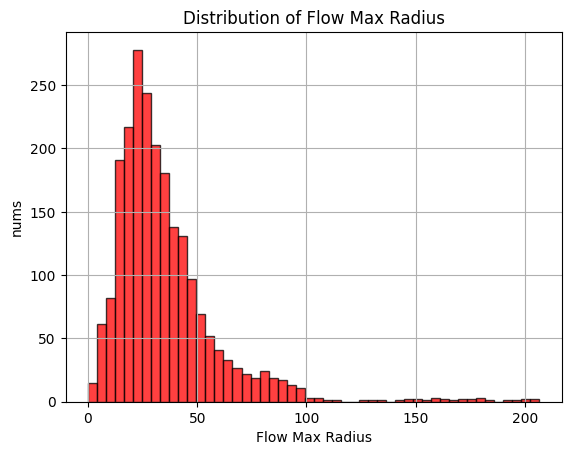

In [3]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming flow_read and replace_nans are defined functions
# from your existing codebase, e.g.,
# from your_module import flow_read, replace_nans

data_path = '/workspace/data/Gopro_my/test'
data_folder = os.listdir(data_path)
data_folder.sort()
master_max = 0
flow_max_radius_list = []

for scene in tqdm(data_folder, ncols=80):
    flow_path = os.path.join(data_path, scene, 'flow/flows', f'{scene}.flo')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    flow_max_radius_list.append(flow_max_radius)
    if flow_max_radius > master_max:
        master_max = flow_max_radius
    if flow_max_radius > 200:
        print(scene)


print(master_max)

# Plotting the histogram of flow_max_radius
plt.hist(flow_max_radius_list, bins=50, alpha=0.75, color='red', edgecolor='black')
plt.title('Distribution of Flow Max Radius')
plt.xlabel('Flow Max Radius')
plt.ylabel('nums')
plt.grid(True)
plt.show()


In [29]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

data_path = '/workspace/data/Gopro_my/test'
data_folder = os.listdir(data_path)
data_folder.sort()
master_max = 0
flow_max_radius_list = []

for scene in tqdm(data_folder, ncols=80):
    flow_path = os.path.join(data_path, scene, 'flow/flows', f'{scene}.flo')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)

    u, v = flow[:,:,0], flow[:,:,1]
    magnitude = np.sqrt(u**2 + v**2)
    max_magnitude = np.max(magnitude)

    print(flow_max_radius, max_magnitude)
    break







  0%|                                                  | 0/2222 [00:00<?, ?it/s]

29.007277 29.007277


# Gopro

In [2]:
import os,glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

000040


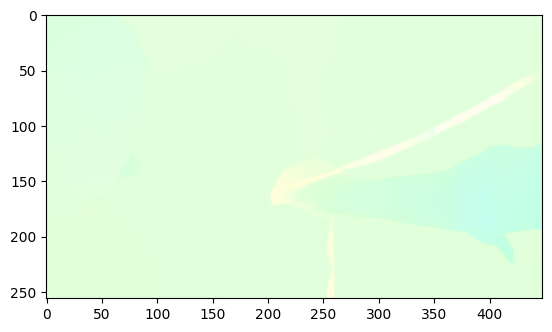

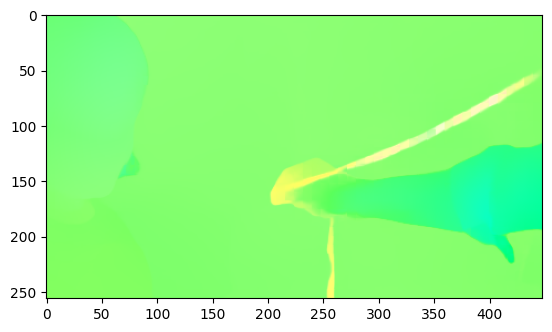

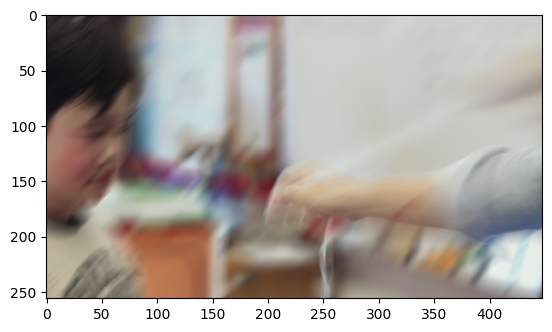

36.56236


In [21]:
gopro_path = '/workspace/data/vimeo/train'
gopro_folder = os.listdir(gopro_path)
gopro_folder.sort()

for scene in gopro_folder[39:]:
    print(scene)
    flow_path = os.path.join(gopro_path,scene,'flow/flows',f'{scene}.flo')
    flow = flow_read(flow_path)
    flow_rgb = flow_to_rgb(flow,flow_max_radius=150)
    flow_rgb_2 = flow_to_rgb(flow)

    tt = Image.fromarray(flow_rgb)

    blur_img = os.path.join(gopro_path,scene,'blur',f'{scene}.png')
    blur = Image.open(blur_img)
    plt.imshow(flow_rgb)
    plt.show()
    plt.imshow(flow_rgb_2)
    plt.show()
    plt.imshow(blur)
    plt.show()

    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    print(flow_max_radius)
    break

hflip


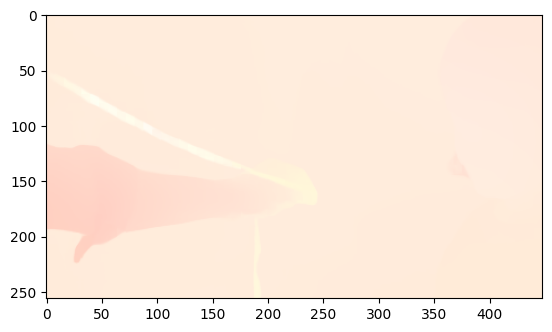

36.56236


In [28]:
def augment_flow(flow, command):

    if command == 'hflip':  # horizontal
        cv2.flip(flow, 1, flow)
        flow[:, :, 0] *= -1

    elif command ==  'vflip':  # vertical
        cv2.flip(flow, 0, flow)
        flow[:, :, 1] *= -1

    elif command ==  'rot90':
        flow = flow.transpose(1, 0, 2)
        flow = flow[:, :, [1, 0]]

    else:
        assert 'Wrong command!'

    return flow

flow_path = '/workspace/data/vimeo/train/000040/flow/flows/000040.flo'
flow = flow_read(flow_path)

commands = ['hflip', 'vflip', 'noop', 'rot90']
command = np.random.choice(commands)
print(command)
if command != 'noop':
    flow = augment_flow(flow,command)


flow_rgb = flow_to_rgb(flow,flow_max_radius=150)
tt = Image.fromarray(flow_rgb)

plt.imshow(flow_rgb)
plt.show()

complex_flow = flow[..., 0] + 1j * flow[..., 1]
complex_flow, nan_mask = replace_nans(complex_flow)
radius, angle = np.abs(complex_flow), np.angle(complex_flow)
flow_max_radius = np.max(radius)
print(flow_max_radius)


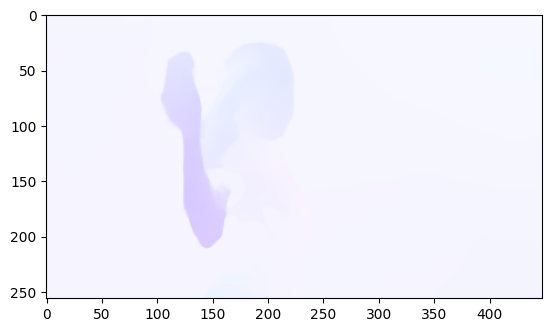

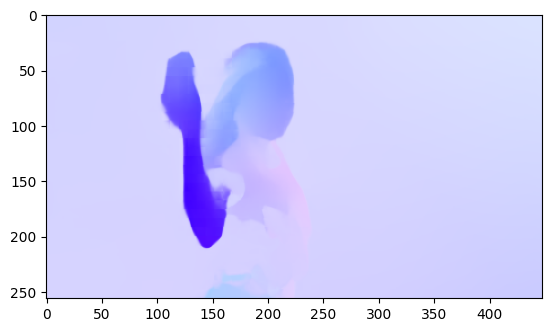

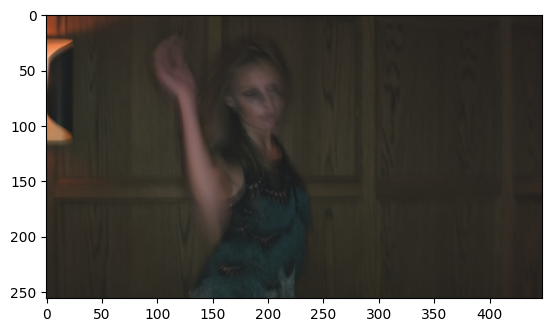

31.784233


In [23]:
gopro_path = '/workspace/data/vimeo/train'
gopro_folder = os.listdir(gopro_path)
gopro_folder.sort()

for scene in gopro_folder[92700:]:
    flow_path = os.path.join(gopro_path,scene,'flow/flows',f'{scene}.flo')
    flow = flow_read(flow_path)
    flow_rgb = flow_to_rgb(flow,flow_max_radius=150)
    flow_rgb_2 = flow_to_rgb(flow)
    blur_img = os.path.join(gopro_path,scene,'blur',f'{scene}.png')
    blur = Image.open(blur_img)
    plt.imshow(flow_rgb)
    plt.show()
    plt.imshow(flow_rgb_2)
    plt.show()
    plt.imshow(blur)
    plt.show()

    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    print(flow_max_radius)
    break

In [ ]:
gopro_path = '/workspace/data/vimeo/train'
gopro_folder = os.listdir(gopro_path)
gopro_folder.sort()

for scene in gopro_folder[96700:]:
    flow_path = os.path.join(gopro_path,scene,'flow/flows',f'{scene}.flo')
    flow = flow_read(flow_path)
    flow_rgb = flow_to_rgb(flow,flow_max_radius=150)
    flow_rgb_2 = flow_to_rgb(flow)
    blur_img = os.path.join(gopro_path,scene,'blur',f'{scene}.png')
    blur = Image.open(blur_img)
    plt.imshow(flow_rgb)
    plt.show()
    plt.imshow(flow_rgb_2)
    plt.show()
    plt.imshow(blur)
    plt.show()

    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    print(flow_max_radius)
    break

In [1]:
import os

folders = os.listdir('results/Gopro_with_gt')
folders.sort()
print(len(folders))

cnt = 0
for folder in folders:
    root_path = 'results/Gopro_with_gt'
    img_folder = os.path.join(root_path,folder)
    imgs = os.listdir(img_folder)
    
    if len(imgs) !=20:
        cnt+=1
    
print(cnt)

2103
534


In [13]:
import os

path = '/workspace/data/Gopro_my/train'
folders = os.listdir(path)
folders.sort()

with open('dataset/train/train_gopro.txt', 'a') as f:
    for folder in folders:
        imgs = os.listdir(os.path.join(path,folder,'blur'))
        imgs.sort()
        for img in imgs:
            img_path = os.path.join(path,folder,'blur',img)
            f.write(f'{img_path}\n')
    
        


In [12]:
img_path

'/workspace/data/Gopro_my/train/004206/blur/004206.png'